In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

from thinkdsp import decorate, read_wave, Wave

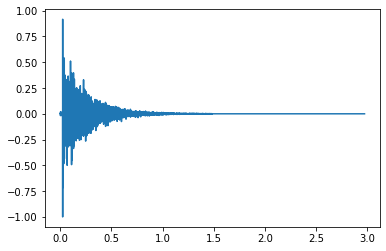

In [3]:
response = read_wave('kleeb__gunshot.wav')
start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.truncate(2**16)
response.zero_pad(2**17)

response.normalize()
response.plot()

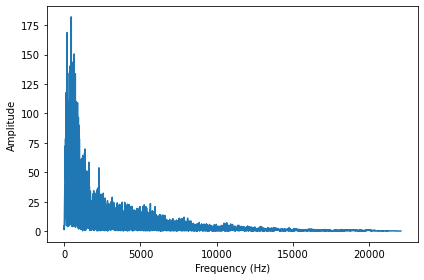

In [4]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

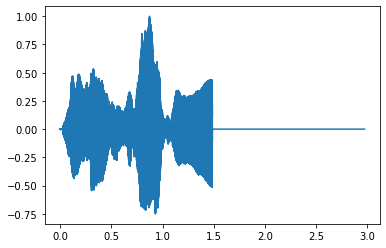

In [5]:
violin = read_wave('violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(2**16)
violin.zero_pad(2**17)

violin.normalize()
violin.plot()

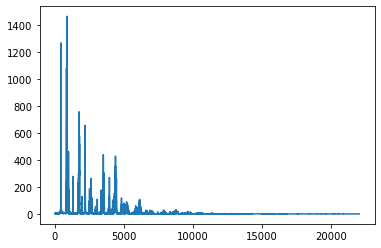

In [6]:
spectrum = violin.make_spectrum()
spectrum.plot()

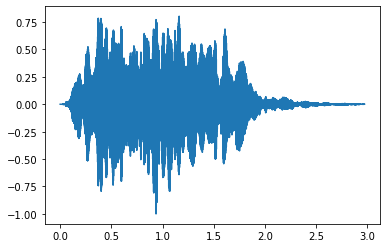

In [7]:
output = (spectrum * transfer).make_wave()
output.normalize()
output.plot()

In [8]:
violin.make_audio()

In [9]:
output.make_audio()

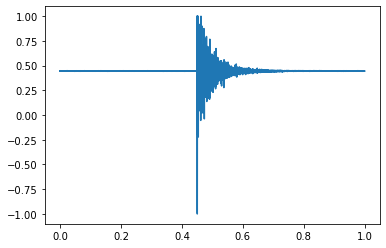

In [10]:
response = read_wave('b2.wav')

start = 0
duration = 1
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.plot()

In [11]:
response.make_audio()

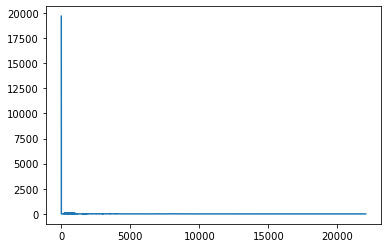

In [12]:
transfer = response.make_spectrum()
transfer.plot()

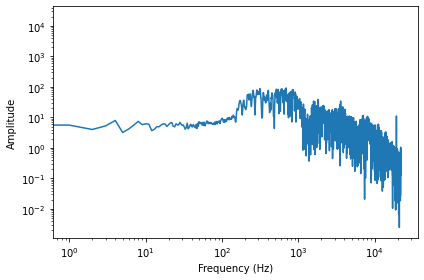

In [13]:
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude', xscale='log', yscale='log')

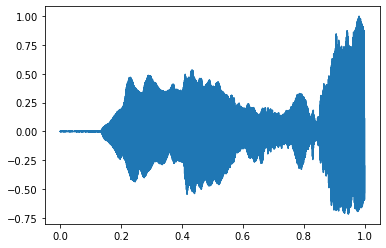

In [14]:
wave = read_wave('violin-origional.wav')

start = 0.0
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()

In [15]:
wave.make_audio()

In [16]:
spectrum = wave.make_spectrum()

In [17]:
len(spectrum.hs), len(transfer.hs)

(22051, 22051)

In [18]:
spectrum.fs

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 2.2048e+04, 2.2049e+04,
       2.2050e+04])

In [19]:
transfer.fs

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 2.2048e+04, 2.2049e+04,
       2.2050e+04])

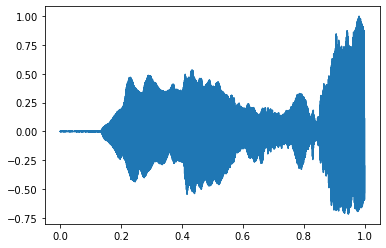

In [21]:
output = (spectrum * transfer).make_wave()
output.normalize()
wave.plot()

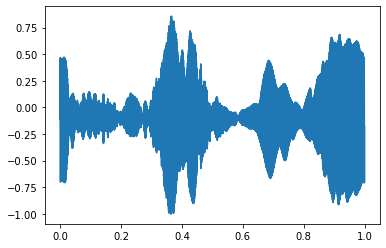

In [22]:
output.plot()

In [23]:
output.make_audio()

In [24]:
convolved2 = wave.convolve(response)
convolved2.normalize()
convolved2.make_audio()